In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/home/jyop/Documents/Mushrooms/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df = pd.DataFrame(data=data)

In [4]:
x = df.drop('class', axis=1)
y = data['class']
print(y)

0       p
1       e
2       e
3       p
4       e
5       e
6       e
7       e
8       p
9       e
10      e
11      e
12      e
13      p
14      e
15      e
16      e
17      p
18      p
19      p
20      e
21      p
22      e
23      e
24      e
25      p
26      e
27      e
28      e
29      e
       ..
8094    e
8095    p
8096    e
8097    p
8098    p
8099    e
8100    e
8101    p
8102    e
8103    e
8104    e
8105    e
8106    e
8107    e
8108    p
8109    e
8110    e
8111    e
8112    e
8113    p
8114    p
8115    e
8116    p
8117    p
8118    p
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label y with binaries
Y = le.fit_transform(y)
print(Y)

[1 0 0 ... 0 1 0]


In [6]:
#dummy variable to x in order to simplify the work
X = pd.get_dummies(x)
print(X)

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
5               0            0            0            0            0   
6               1            0            0            0            0   
7               1            0            0            0            0   
8               0            0            0            0            0   
9               1            0            0            0            0   
10              0            0            0            0            0   
11              0            0            0            0            0   
12              1            0            0        

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(Y_test.shape)

(2438,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [9]:
logi_reg = LogisticRegression()
sol = logi_reg.fit(X_train, Y_train)
print(sol)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [10]:
y_prob = logi_reg.predict_proba(X_test)
y_pred = logi_reg.predict(X_train)
print(y_pred.shape)

(5686,)


In [11]:
from sklearn.metrics import confusion_matrix
ans = confusion_matrix(Y_train, y_pred)
print(ans)

[[2964    0]
 [   0 2722]]


In [12]:
from sklearn.metrics import accuracy_score,classification_report
Report = classification_report(Y_train, y_pred)
Score = accuracy_score(Y_train, y_pred)

In [13]:
print("§ Confusion Matrix:\n",ans)
print("§ Classification Report:\n",Report)
print("§ Accuracy Score:\n",Score)

§ Confusion Matrix:
 [[2964    0]
 [   0 2722]]
§ Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      2964
          1       1.00      1.00      1.00      2722

avg / total       1.00      1.00      1.00      5686

§ Accuracy Score:
 1.0


In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [16]:
model = KNN(n_neighbors=2)
fit = model.fit(X_train, Y_train)
y_prob1 = model.predict_proba(X_test)
y_pred1 = model.predict(X_train)
ans1 = confusion_matrix(Y_train, y_pred1)
Report1 = classification_report(Y_train, y_pred1)
Score1 = model.score(X_train, y_pred1)

In [17]:
print("§ Confusion Matrix:\n",ans1)
print("§ Classification Report:\n",Report1)
print("§ Accuracy Score:\n",Score1)

§ Confusion Matrix:
 [[2964    0]
 [   0 2722]]
§ Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      2964
          1       1.00      1.00      1.00      2722

avg / total       1.00      1.00      1.00      5686

§ Accuracy Score:
 1.0


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
fit1 = pca.fit_transform(X)
pre = pca.explained_variance_ratio_
print(pre)
print(len(fit1))

[0.16810879 0.13889755]
8124


In [22]:
principalDf = pd.DataFrame(data = fit1,columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

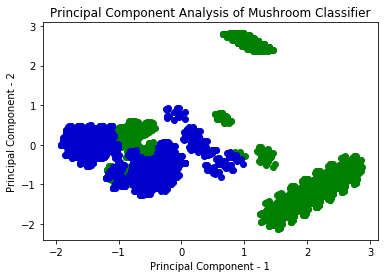

In [28]:
import matplotlib.pyplot as plt
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title("Principal Component Analysis of Mushroom Classifier")
targets = ['p', 'e']
colors = ['g','mediumblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
plt.show()